In [15]:
from torchvision import datasets
from torchvision import transforms
import torch
import torch.nn as nn
import numpy as np

from torch.utils.data import TensorDataset, DataLoader

In [2]:
rootdir = './Data_cfar10'
T=datasets.CIFAR10(rootdir,train=True,download=True)
V=datasets.CIFAR10(rootdir,train=False,download=True)


100.0%


Extracting ./Data_cfar10/cifar-10-python.tar.gz to ./Data_cfar10
Files already downloaded and verified


In [3]:
len(T)

50000

In [4]:
len(V)

10000

In [7]:
type(T)

torchvision.datasets.cifar.CIFAR10

In [8]:
X,y = T[12]

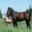

In [9]:
X

In [10]:
T.classes[y]

'horse'

In [11]:
np.array(X).shape

(32, 32, 3)

In [12]:
32*32*3 #vector correspondng this image

3072

In [13]:

T=datasets.CIFAR10(rootdir,train=True,download=True, transform=transforms.ToTensor())
V=datasets.CIFAR10(rootdir,train=False,download=True,transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [18]:
tL = torch.utils.data.DataLoader(T,batch_size = 64, shuffle=True,drop_last=True)
vL = torch.utils.data.DataLoader(V,batch_size = 64, shuffle=True,drop_last=True)

In [30]:
model= nn.Sequential(
    nn.Linear(3072,100),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(100,10),
    nn.LogSoftmax(dim=1)
)


In [31]:
loss_fn= nn.NLLLoss()

In [32]:
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer,len(tL))

In [33]:
nepochs = 2
for e in range(nepochs):
    eLoss= 0 
    for X,y in tL:
        batch_size = X.shape[0]
        y_hat = model(X.view(batch_size,-1))
        loss = loss_fn(y_hat,y)
        eLoss+= loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    scheduler.step()
    print(float(eLoss))

1828.69384765625
1799.1168212890625


In [36]:
c = 0
t = 0
with torch.no_grad():
    for Xv,yv in vL:
        batch_size = Xv.shape[0]
        y_hat = model(Xv.view(batch_size, -1))
        _,p = torch.max(y_hat,dim=1)
        t+=yv.shape[0]
        c+=int((p==yv).sum())
print(c/t) #accuracy

0.0999599358974359
